In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from scipy.stats import shapiro
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [81]:
%matplotlib inline
traindf = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [82]:
pd.pandas.set_option('display.max_columns', None)

In [83]:
traindf.shape

(1460, 81)

In [84]:
traindf.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
298,299,60,RL,90.0,11700,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,6,1968,1968,Mansard,CompShg,HdBoard,AsphShn,BrkFace,365.0,Gd,TA,CBlock,TA,TA,No,ALQ,384,Rec,175,143,702,GasA,Gd,Y,SBrkr,1041,702,0,1743,0,1,1,2,3,1,TA,7,Typ,1,Gd,Attchd,1968.0,Unf,2,539,TA,TA,Y,224,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,175000
797,798,20,RL,57.0,7677,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,570,Unf,0,203,773,GasA,Gd,Y,SBrkr,773,0,0,773,0,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1953.0,Unf,1,240,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,110000
464,465,20,RL,60.0,8430,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,5,1978,1978,Gable,CompShg,HdBoard,HdBoard,BrkFace,136.0,TA,TA,CBlock,Gd,TA,No,Rec,616,Unf,0,424,1040,GasA,TA,Y,SBrkr,1040,0,0,1040,0,0,2,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,124000
377,378,60,FV,102.0,11143,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1580,1580,GasA,Ex,Y,SBrkr,1580,886,0,2466,0,0,3,0,4,1,Gd,8,Typ,1,Gd,Attchd,2004.0,RFn,2,610,TA,TA,Y,159,214,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,340000


In [85]:
features_having_na = [features for features in traindf.columns if traindf[features].isnull().sum() > 1]
features_having_na

for feature in features_having_na:
    print(feature, np.round(traindf[feature].isnull().mean(), 4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


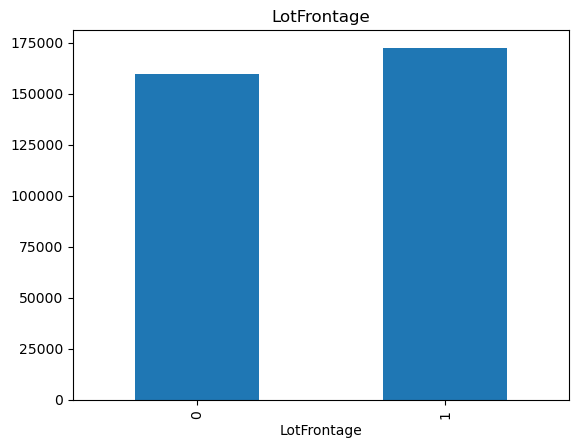

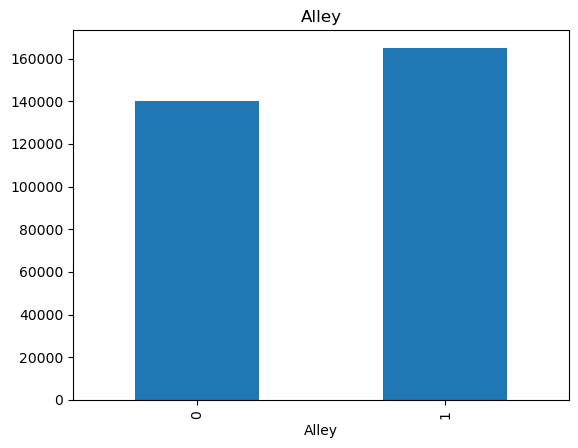

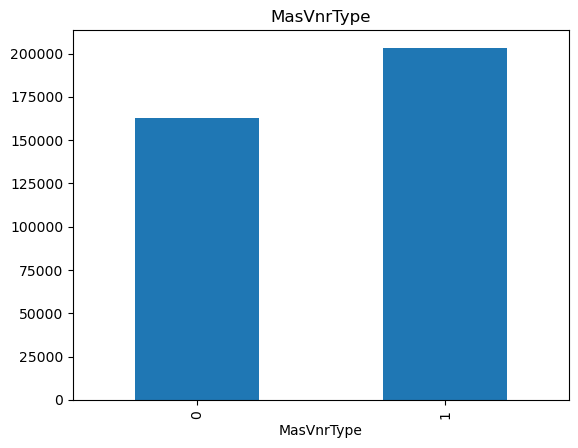

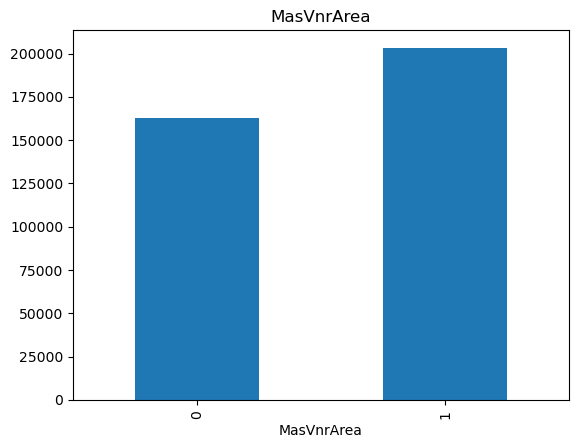

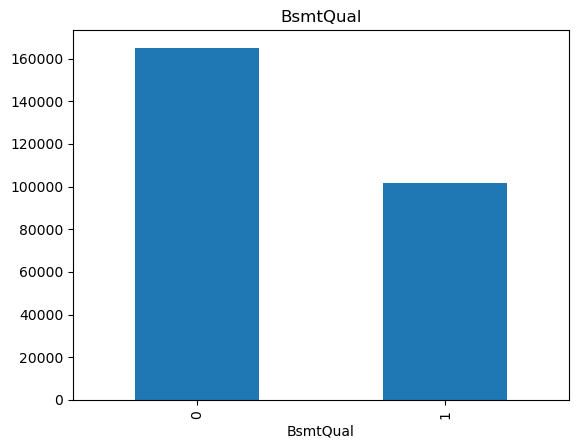

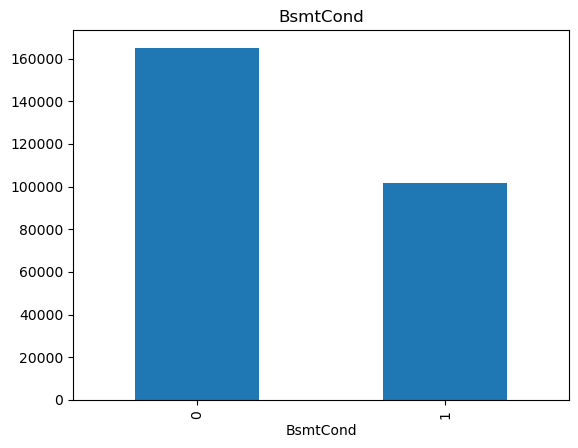

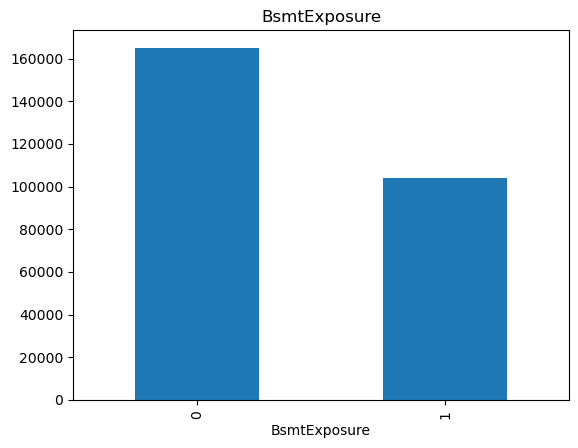

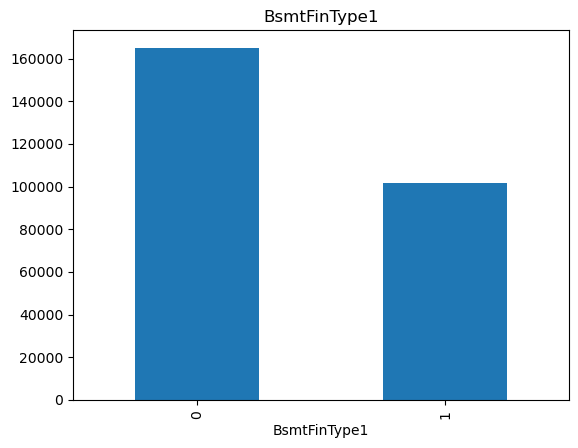

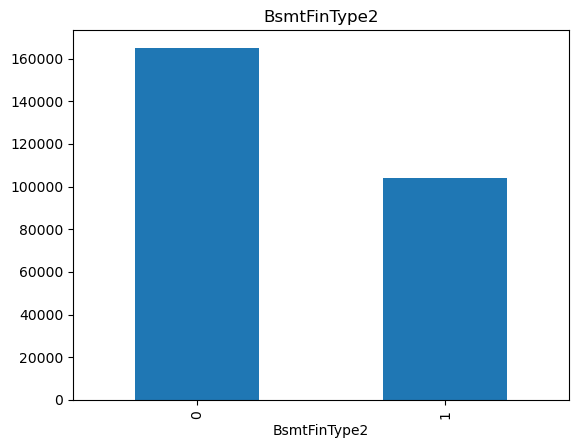

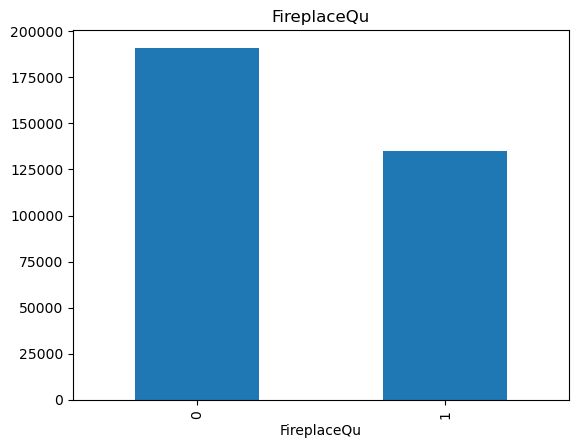

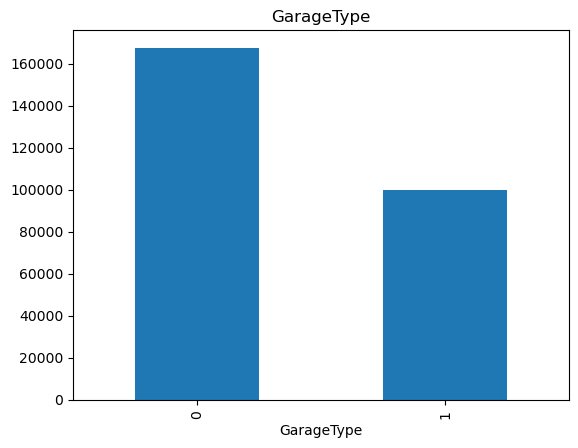

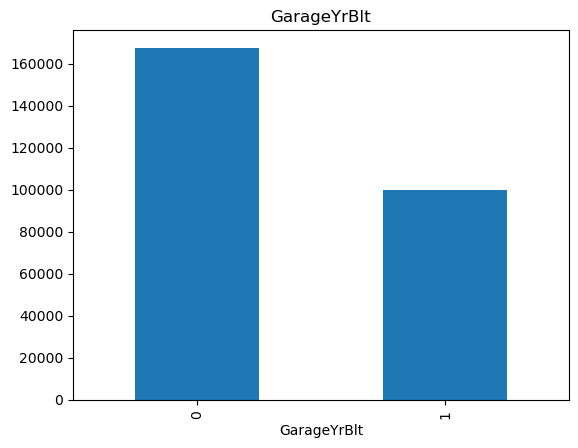

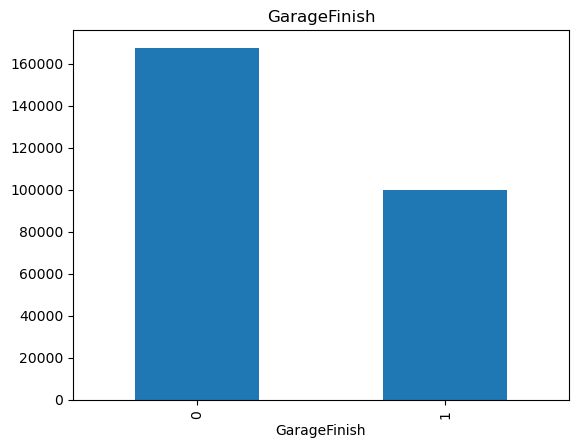

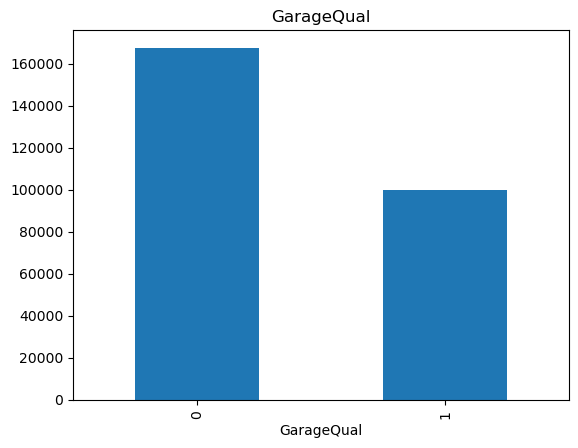

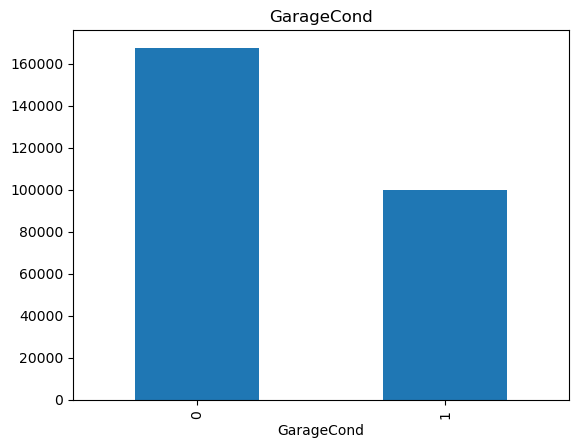

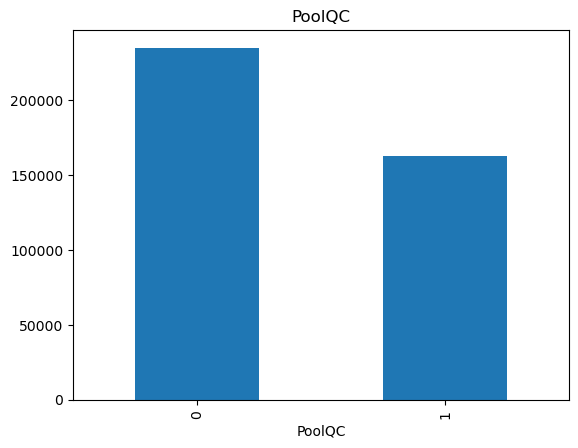

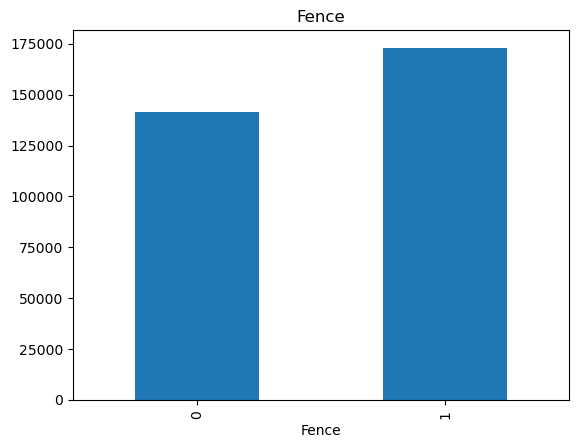

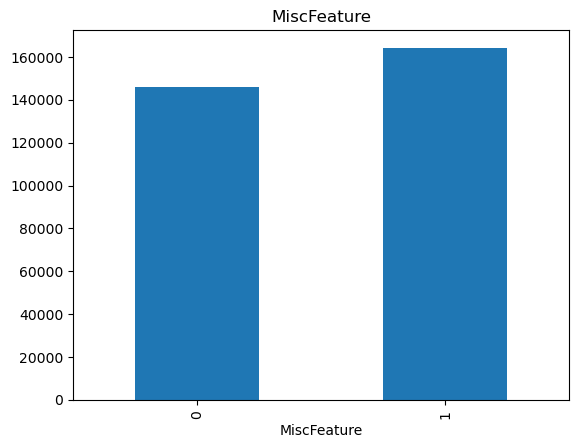

In [86]:
for feature in features_having_na:
    data = traindf.copy()
    
    data[feature]=np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

# Numerical Variables

In [87]:
numerical_features = [feature for feature in traindf.columns if traindf[feature].dtypes != 'O']

print(len(numerical_features))

traindf[numerical_features].head()

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [88]:
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_features
# print(len(numerical_features))

# traindf[numerical_features].head()

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [89]:
traindf['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [90]:
traindf[traindf['Id'] == 1441][['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
1440,1922,1994,1993.0,2008


<AxesSubplot:xlabel='YrSold'>

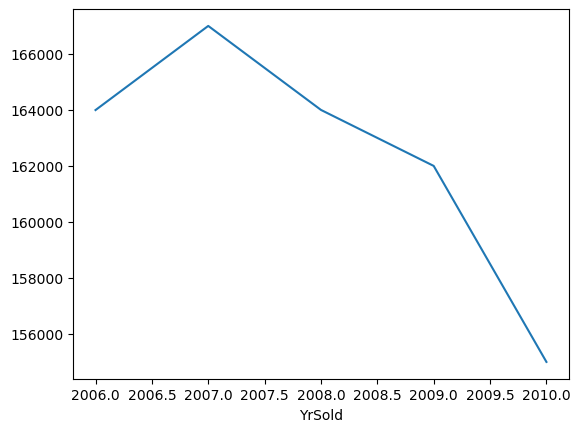

In [91]:
traindf.groupby('YrSold')['SalePrice'].median().plot()

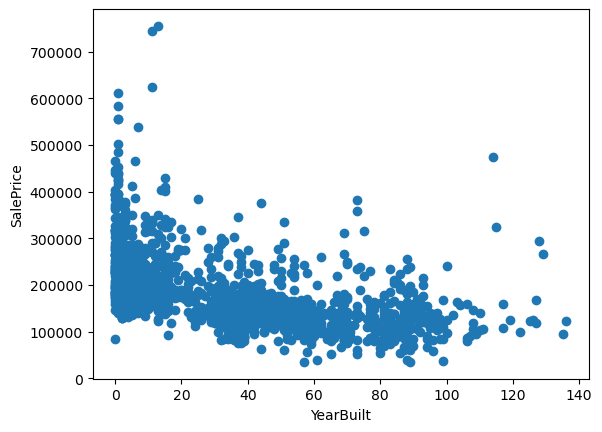

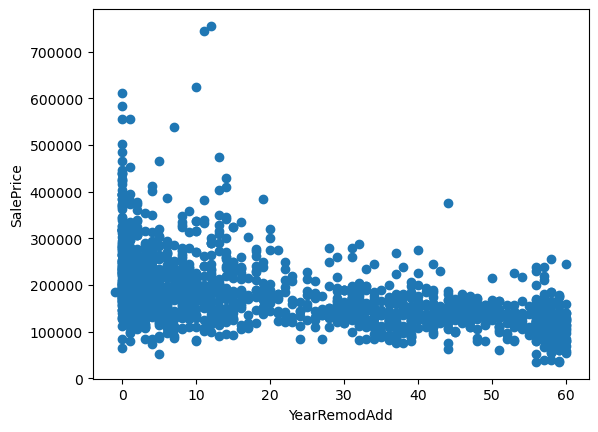

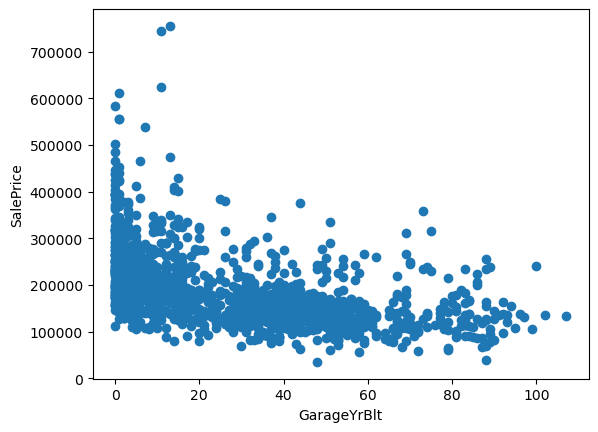

In [92]:
for feature in year_features:
    if feature != 'YrSold':
        data=traindf.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [93]:
discreate_features = [feature for feature in numerical_features if len(traindf[feature].unique())<25 and feature not in year_features+['Id']] 

In [94]:
discreate_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [95]:
traindf[discreate_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


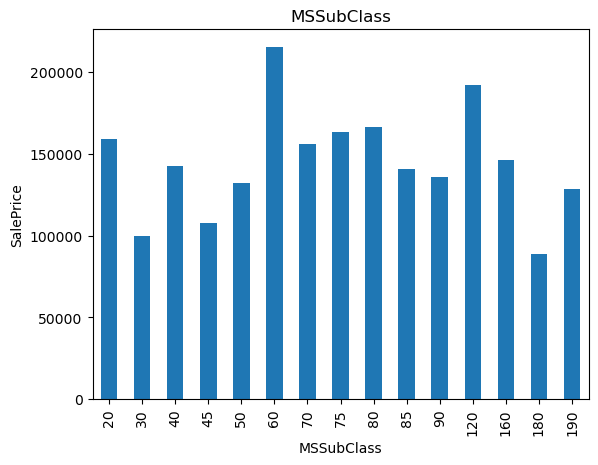

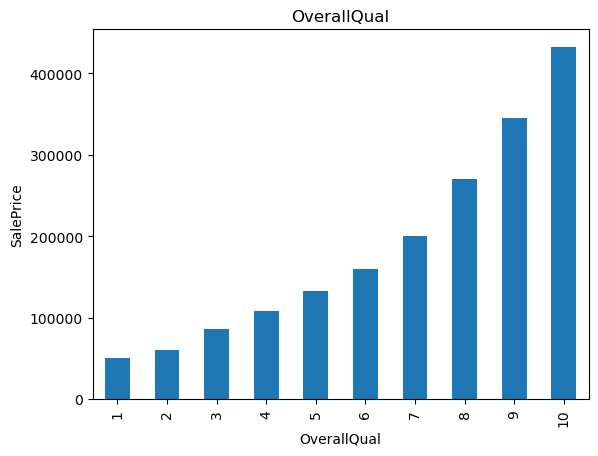

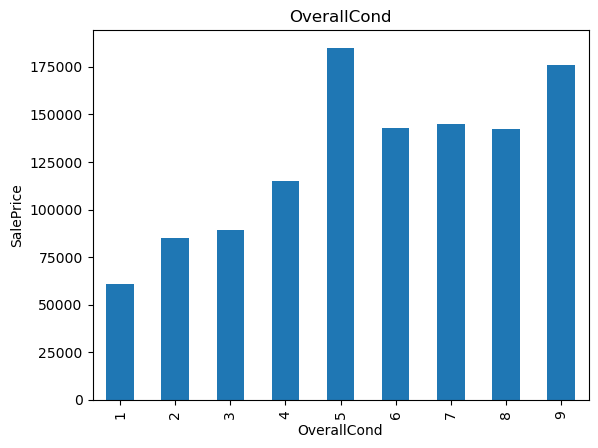

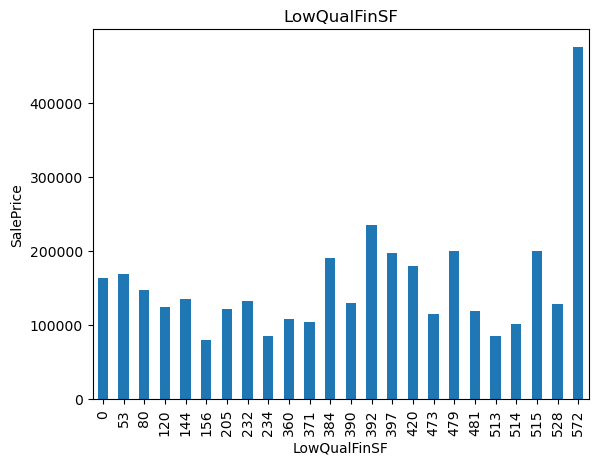

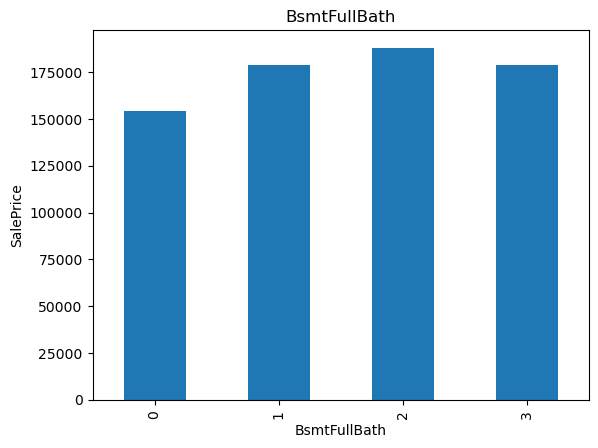

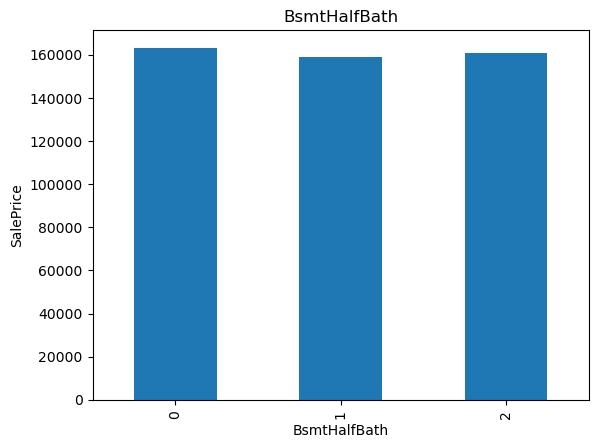

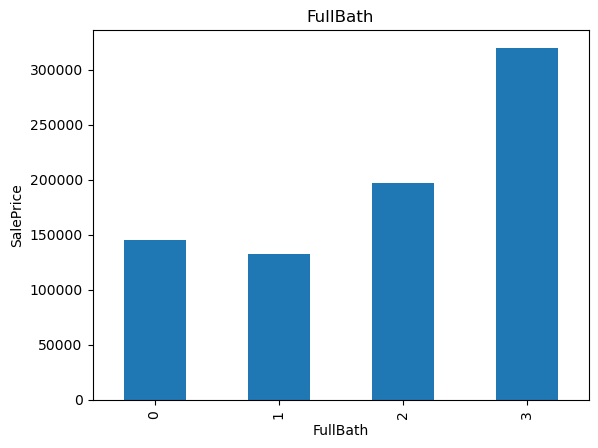

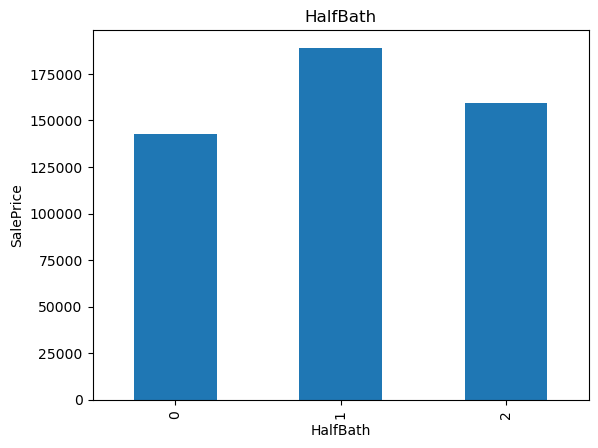

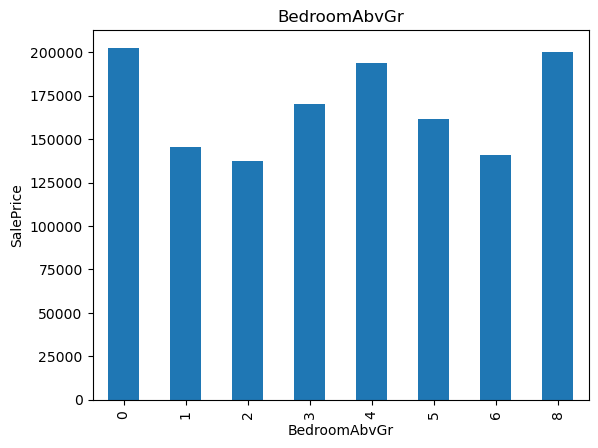

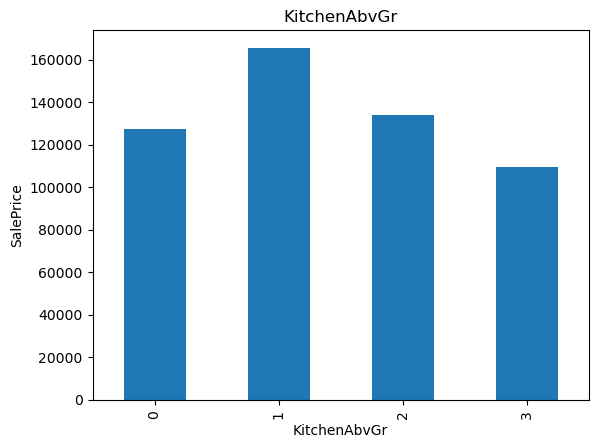

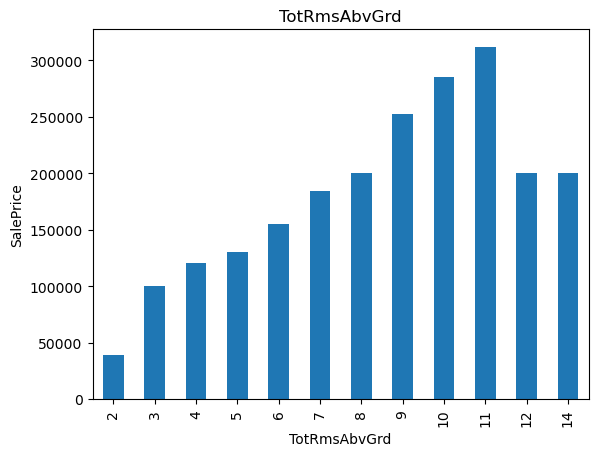

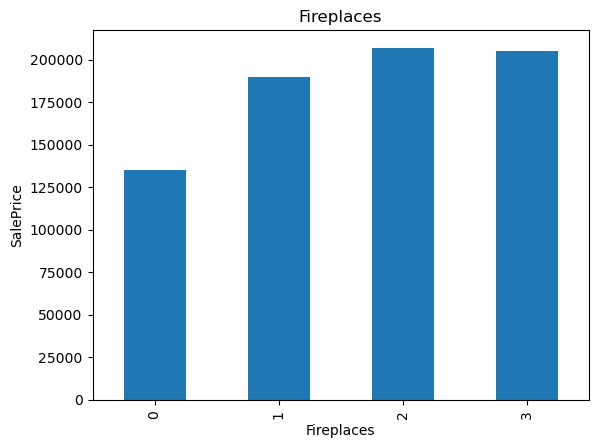

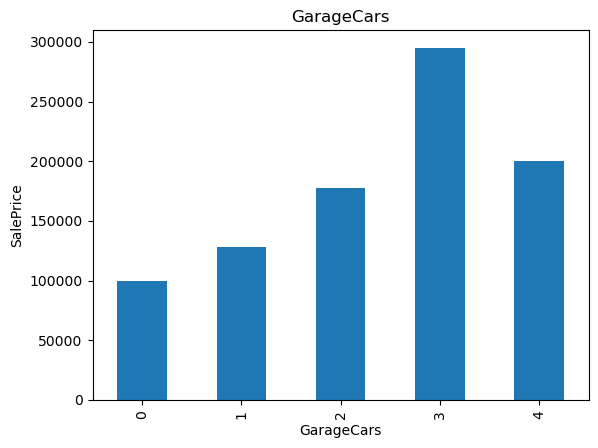

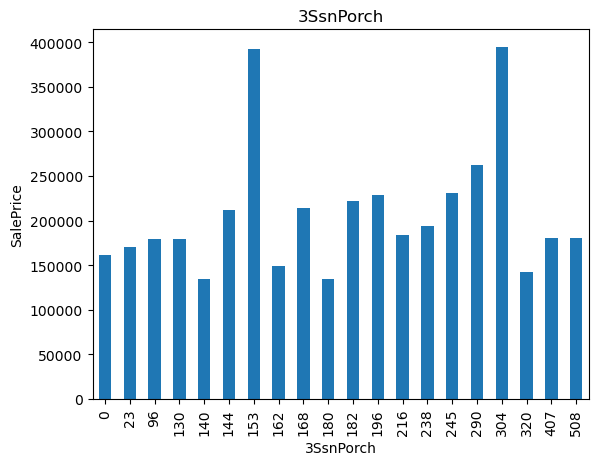

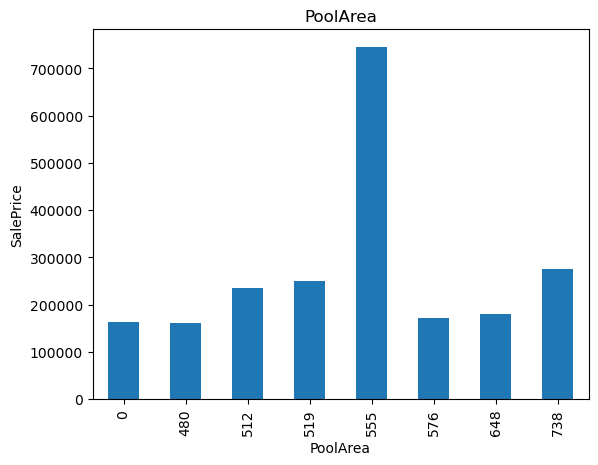

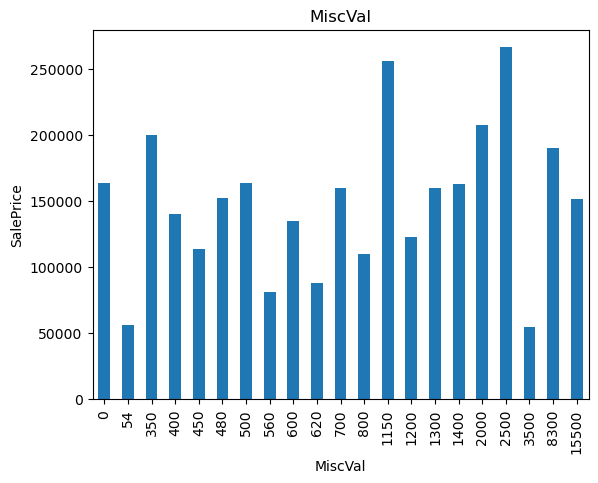

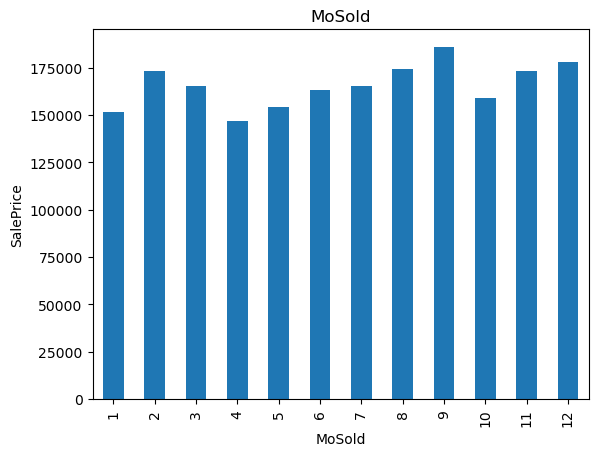

In [96]:
for feature in discreate_features:
    data=traindf.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')    
    plt.title(feature)
    plt.show()

In [97]:
continuous_features = [feature for feature in numerical_features if feature not in discreate_features+year_features+['Id']]

In [98]:
len(continuous_features)

16

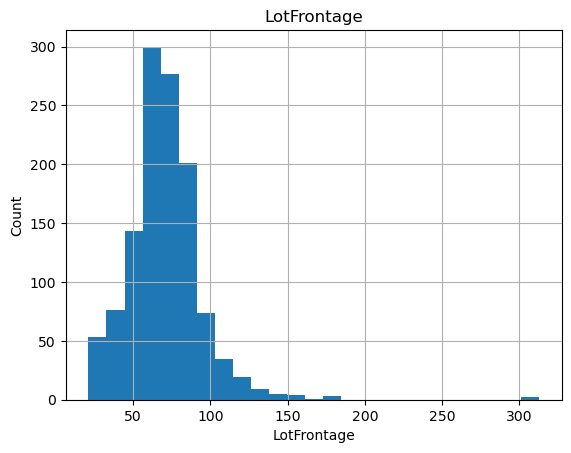

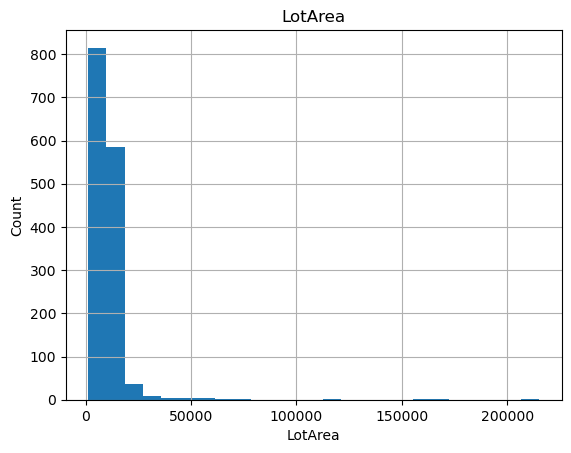

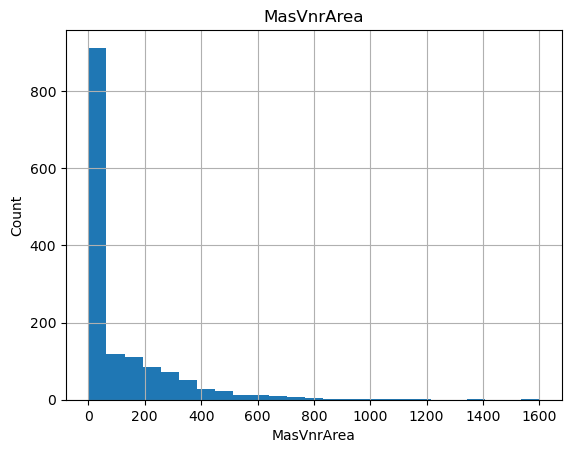

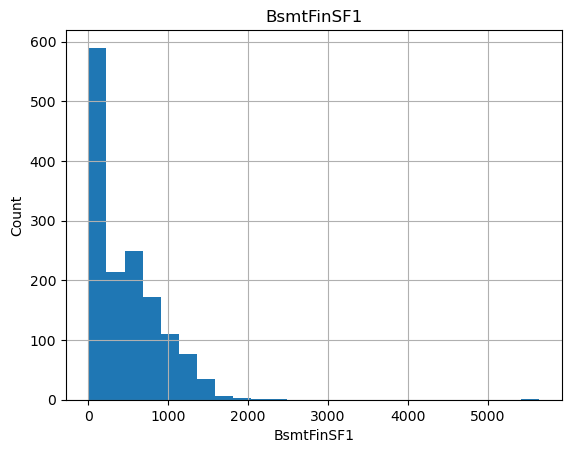

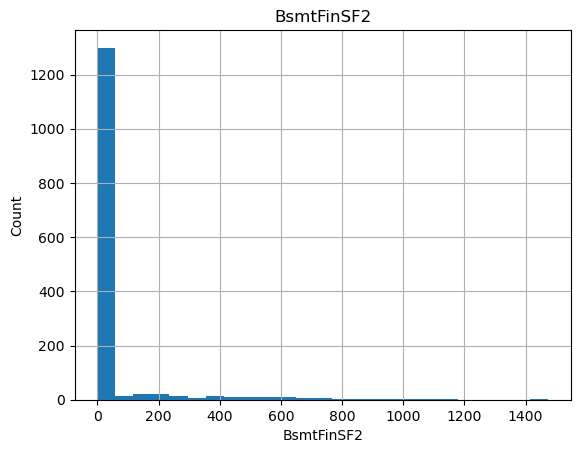

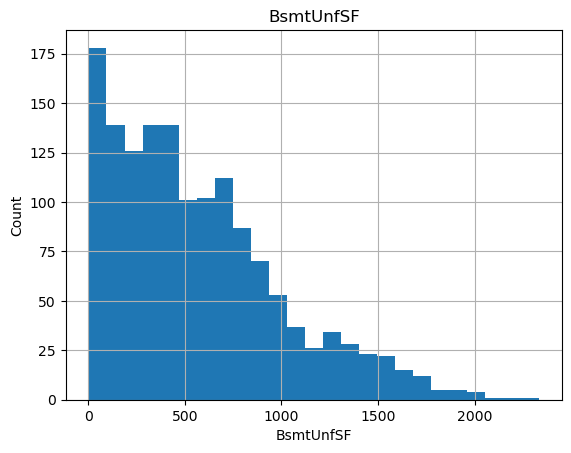

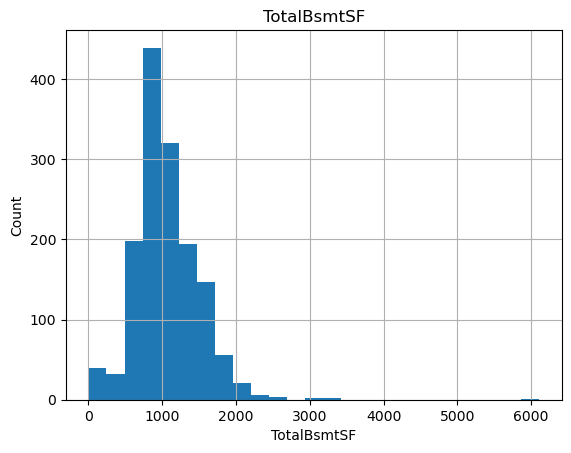

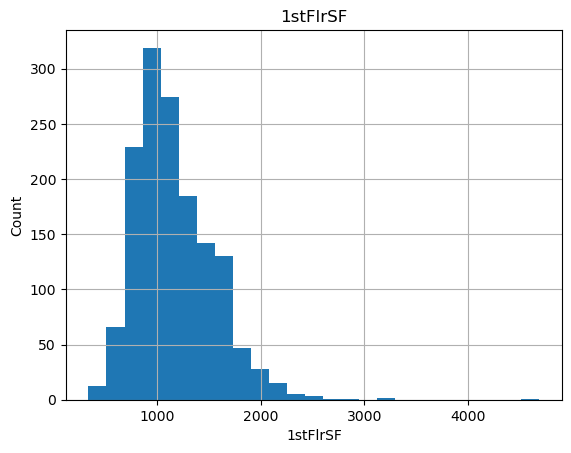

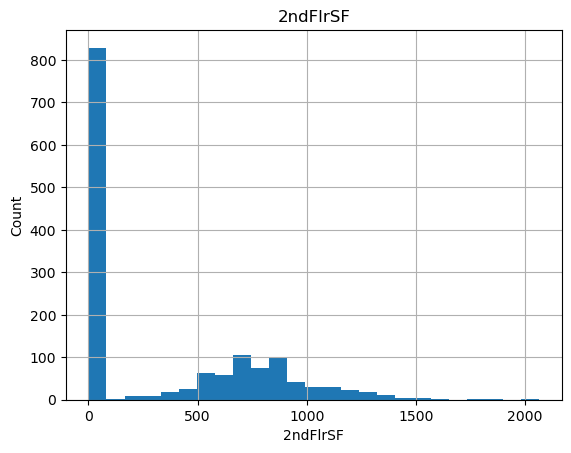

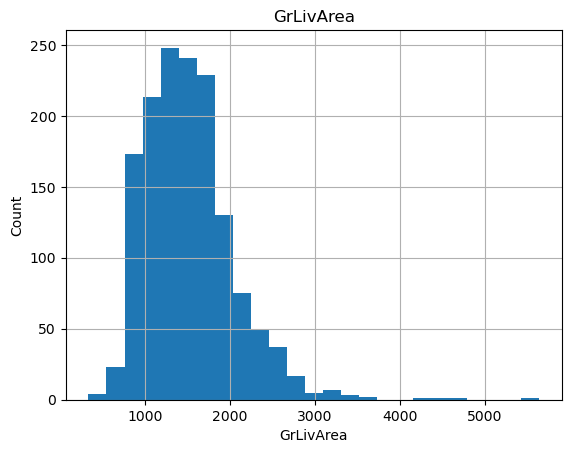

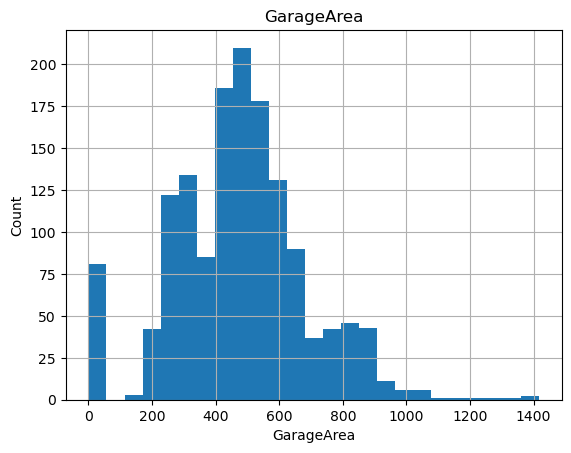

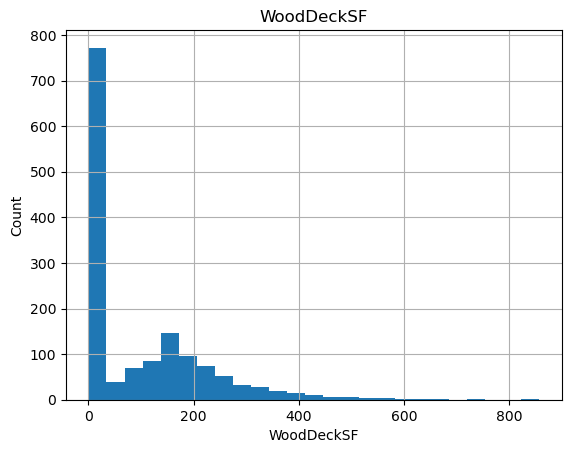

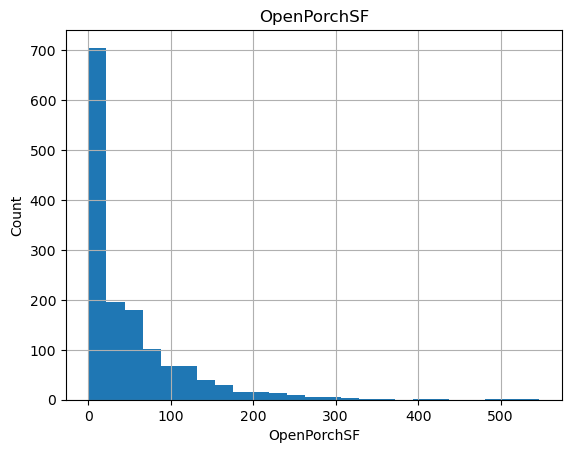

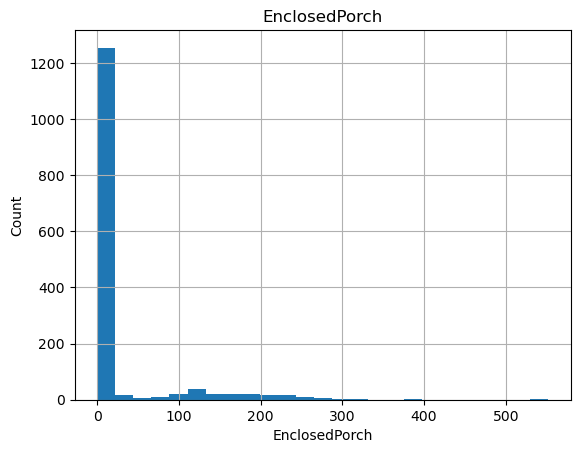

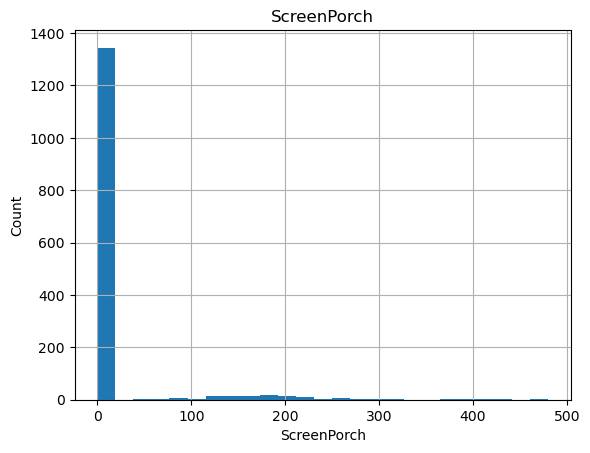

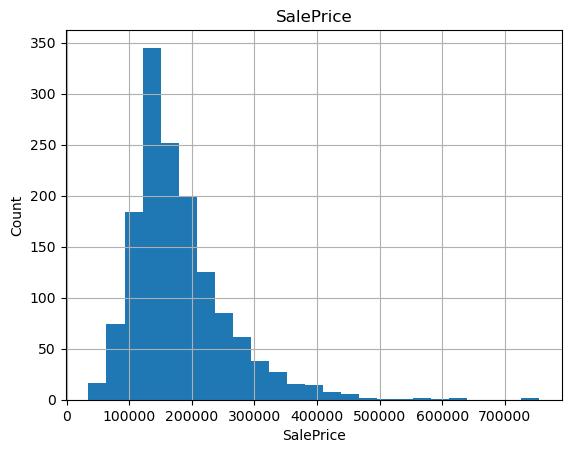

In [99]:
for features in continuous_features:
    data = traindf.copy()
    
    data[features].hist(bins=25)
#     plt.scatter(data[features], data['SalePrice'])
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()

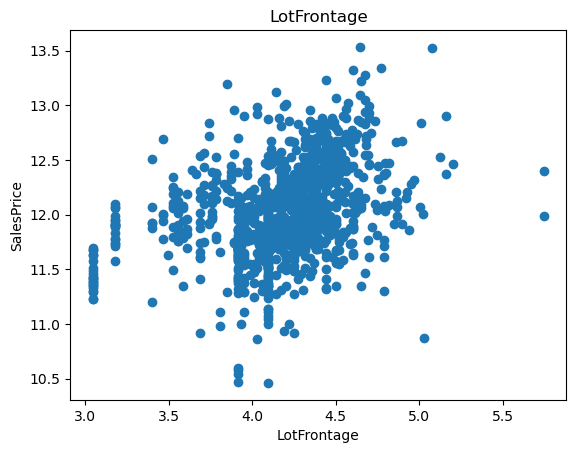

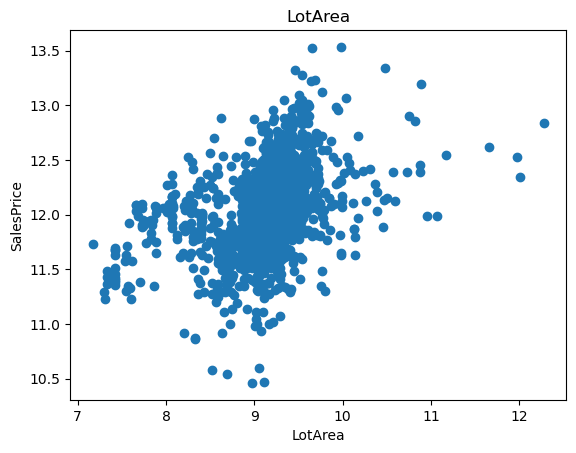

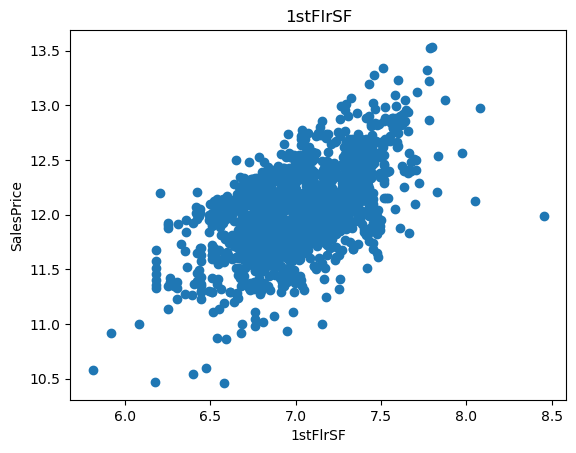

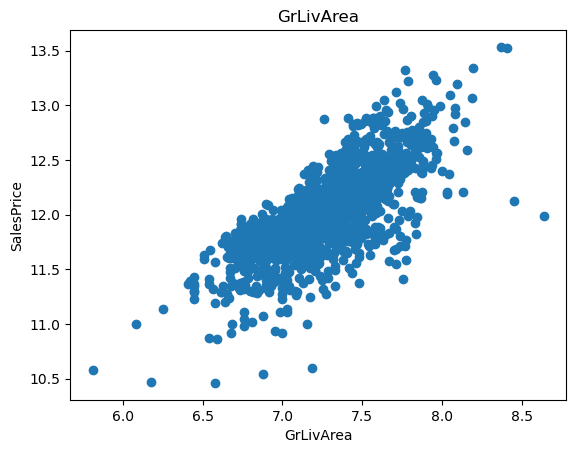

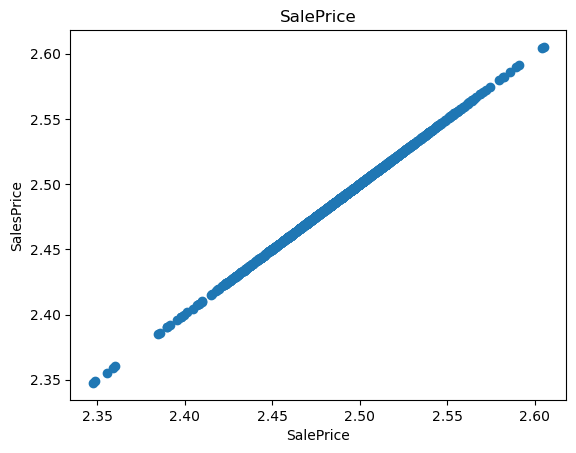

In [146]:
for feature in continuous_features:
    data = traindf.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')   
        plt.title(feature)
        plt.show()


In [100]:
traindf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Univariate Analysis

**Univariate Analysis**

* First of all we will perform analysis on the columns related to the Primary Attributes of the Property
* I will be focusing on the Surface Area & Quality of **Garage, Pool and other attributes of the House**

Utilities

BldgType

HouseStyle

OverallQual

OverallCond

YearBuilt

ExterQual

Foundation

BsmtQual

CentralAir

BsmtFullBath

BsmtHalfBath

FullBath

HalfBath

BedroomAbvGr

Kitchen

KitchenQual

TotRmsAbvGrd

GarageCars

GarageArea 

PoolArea

PoolQC

Fence

SalePrice 



**Lets first consider categorical variables**

**Utilities** : Indicates all all the houses contains all public Utilities only 1 house has Electricity and Gas Only

**BldgType**: Most of the building types are 1 Family

**HouseStyle**: 49% of the Houses are 1 Story & 30% are 2 Story

**OverallQual**: Most of the houses has rating between 5 to 8

**YearBuilt**: The data contains most of the houses that built in 2000 or in 1960s

**ExterQual**: 62% of the houses has Average Exterior and 32% of the houses has Good Exterior

**Foundation**: 44% of the houses has foundation of Poured Contrete % 43% has Cinder Block

**CentralAir**: 93% of the houses contains Centrail Air Conditioning

**BsmtFullBath | FullBath**: Converted to **TotalFullBath**

**TotalFullBath**: 50% of the Houses have 2 full baths, 25% houses have 1 full bath & 20% houses have 3 full baths

**BsmtHalfBath | HalfBath**: Converted to **TotalHalfBath**

**TotalHalfBath**: 58% of the Houses have 0 Half baths 39% Houses have 1 half bath

**BedroomAbvGr**: 55% Houses has 3 Bedrooms. 24% houses has 2 Bedrooms, 1% houses has 2 bedrooms

**KitchenAbvGr**: 95% Houses has 1 Kitchen

**KitchenQual**: 50% houses has Typical Quality Kitchen & 40% houses has Good Quality Kitech

**TotRmsAbvGrd**: Most of the houses has 6 to 7 Rooms above Ground

**GarageCars**: 50% of the houses has capacity of 2 cars & 25% houses has capcaity of 1 car

**GarageArea**: Most of the houses has Garage Area between 250 sqft to 650 sqft

**PoolArea**: 99.5% of the houses has no pool in it, according to data its 0 sq, & only 7 houses has pools

**PoolQC**: Therea are only 7 pools 3 of them are of Good Quality 2 of them are Excellent and 2 of them are Fare Quality


**SalePrice**: Most of the houses have price between 110,000 to 210,000

In [101]:
traindf['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [102]:
traindf['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

<AxesSubplot:ylabel='BldgType'>

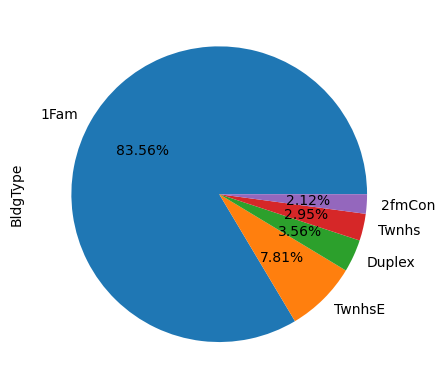

In [103]:
traindf['BldgType'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [104]:
traindf['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

<AxesSubplot:ylabel='HouseStyle'>

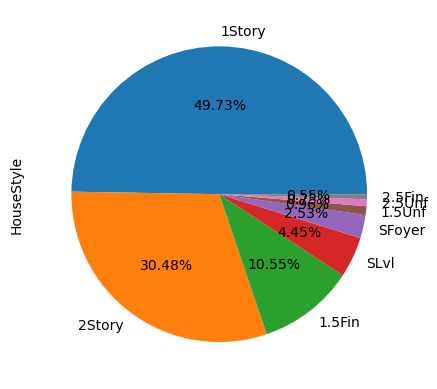

In [105]:
traindf['HouseStyle'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<AxesSubplot:ylabel='OverallQual'>

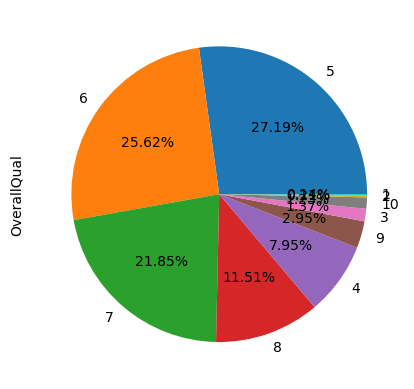

In [106]:
traindf['OverallQual'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [107]:
traindf['YearBuilt'].sample(5)

690    2004
812    1952
210    1925
916    1949
974    1910
Name: YearBuilt, dtype: int64

(array([  9.,   6.,  37., 122.,  83., 128., 261., 223., 139., 452.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <BarContainer object of 10 artists>)

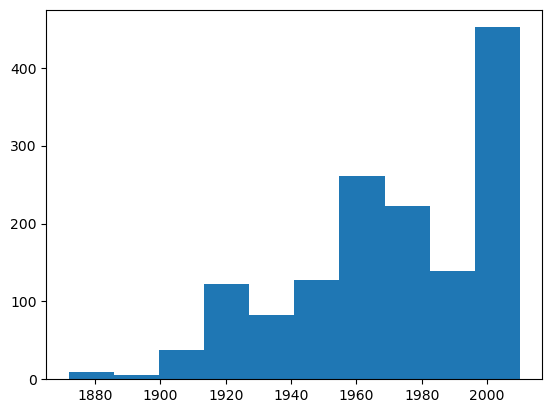

In [108]:
# traindf['YearBuilt'].plot()
plt.hist(traindf['YearBuilt'])

<AxesSubplot:ylabel='ExterQual'>

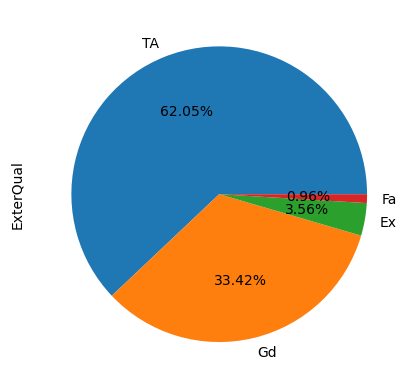

In [109]:
traindf['ExterQual'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<AxesSubplot:ylabel='Foundation'>

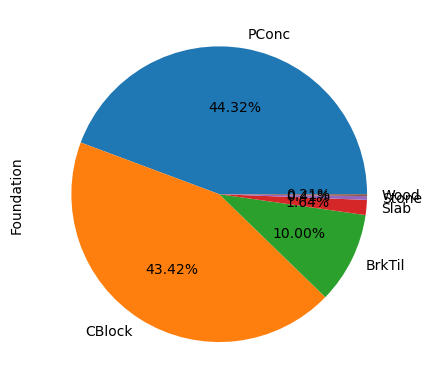

In [110]:
traindf['Foundation'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<AxesSubplot:ylabel='CentralAir'>

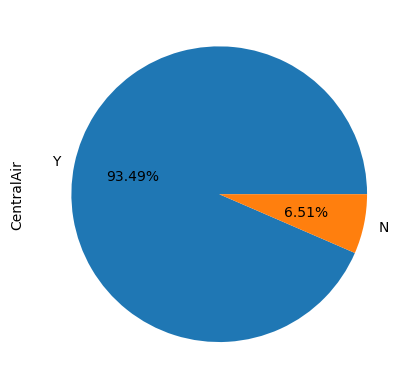

In [111]:
traindf['CentralAir'].value_counts().plot(kind='pie', autopct='%0.2f%%')


<AxesSubplot:ylabel='BedroomAbvGr'>

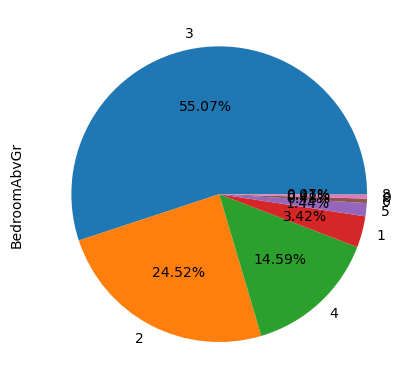

In [112]:
traindf['BedroomAbvGr'].value_counts().plot(kind='pie', autopct='%0.2f%%')


In [113]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:ylabel='KitchenAbvGr'>

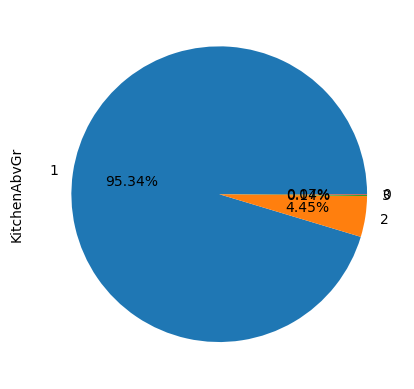

In [114]:
traindf['KitchenAbvGr'].value_counts().plot(kind='pie', autopct='%0.2f%%')



<AxesSubplot:ylabel='KitchenQual'>

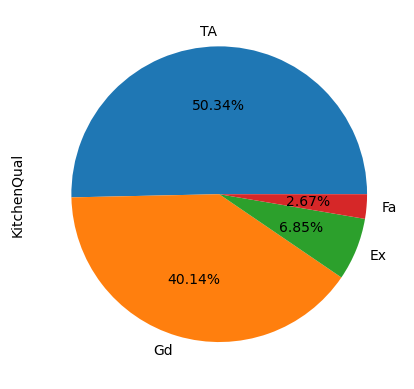

In [115]:
traindf['KitchenQual'].value_counts().plot(kind='pie', autopct='%0.2f%%')


<AxesSubplot:ylabel='TotRmsAbvGrd'>

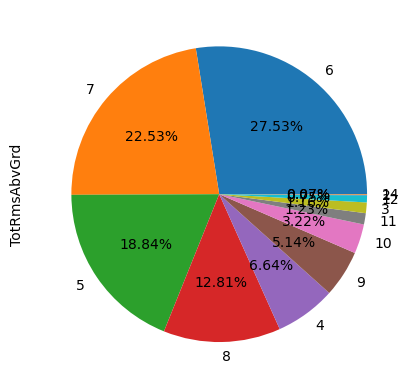

In [116]:
traindf['TotRmsAbvGrd'].value_counts().plot(kind='pie', autopct='%0.2f%%')


<AxesSubplot:ylabel='GarageCars'>

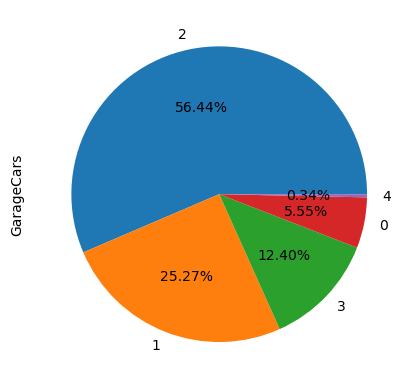

In [117]:
traindf['GarageCars'].value_counts().plot(kind='pie', autopct='%0.2f%%')


In [118]:
traindf['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

<AxesSubplot:>

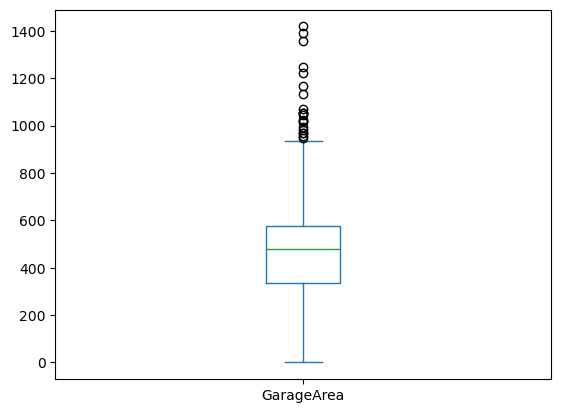

In [119]:
traindf['GarageArea'].plot(kind='box')

(array([ 81., 167., 293., 500., 240., 106.,  57.,  10.,   3.,   3.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <BarContainer object of 10 artists>)

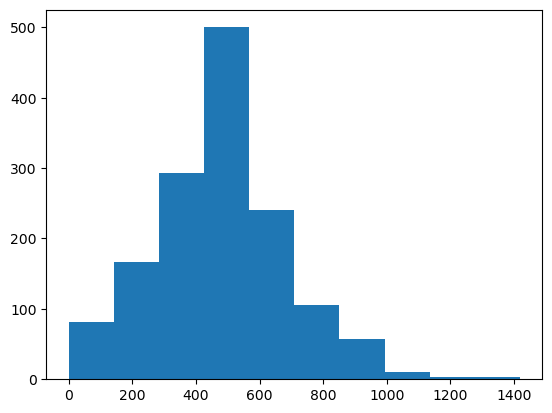

In [120]:
plt.hist(traindf['GarageArea'])

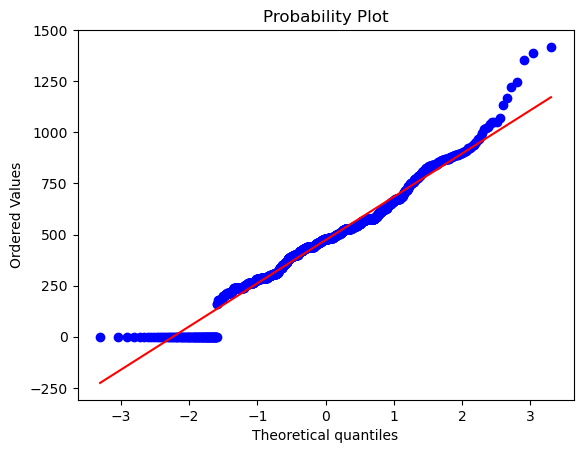

In [121]:
# Generate the plot using matplotlib
stats.probplot(traindf['GarageArea'], dist='norm', plot=pylab)
plt.show()
pylab.show()

In [122]:
stats, p = shapiro(traindf['GarageArea'])

print('stats-%.2f, p-%.30f' % (stats, p))

if p > 0.5:
    print('Normal Distribution')
else:
    print('Not a Normal Distribution')

stats-0.98, p-0.000000000000004018698690337087
Not a Normal Distribution


<AxesSubplot:ylabel='PoolArea'>

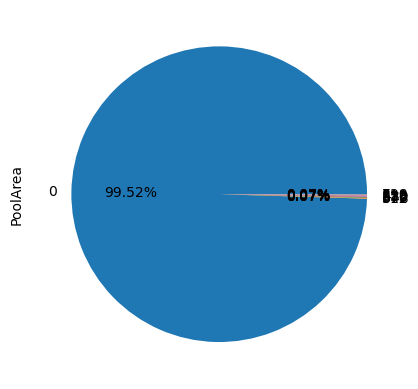

In [123]:
traindf['PoolArea'].value_counts().plot(kind='pie', autopct='%0.2f%%')


(array([1.453e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  73.8, 147.6, 221.4, 295.2, 369. , 442.8, 516.6, 590.4,
        664.2, 738. ]),
 <BarContainer object of 10 artists>)

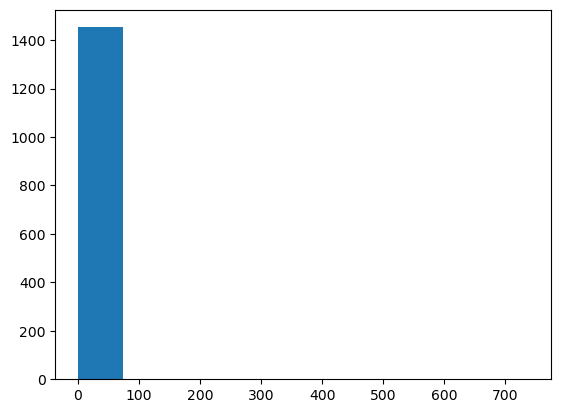

In [124]:
plt.hist(traindf['PoolArea'])

In [125]:
traindf['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

**Performing Feature Engineering on BsmtFullBath and FullBath**

In [126]:
traindf['TotalFullBath'] = traindf['BsmtFullBath'] + traindf['FullBath']

<AxesSubplot:ylabel='TotalFullBath'>

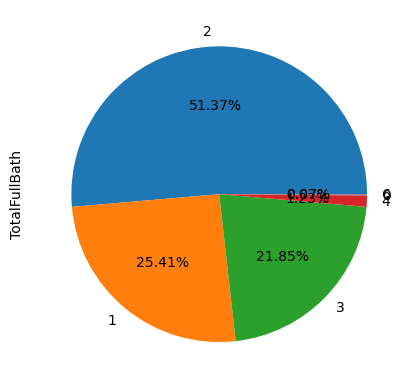

In [127]:
traindf['TotalFullBath'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [128]:
traindf['TotalHalfBath'] = traindf['BsmtHalfBath'] + traindf['HalfBath']

<AxesSubplot:ylabel='TotalHalfBath'>

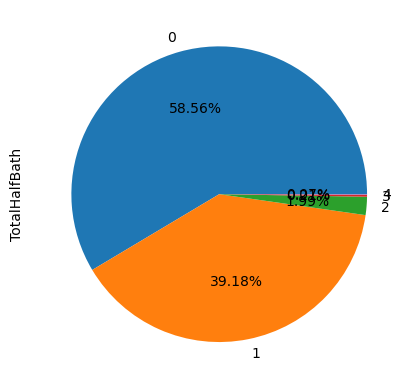

In [129]:
traindf['TotalHalfBath'].value_counts().plot(kind='pie', autopct='%0.2f%%')

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

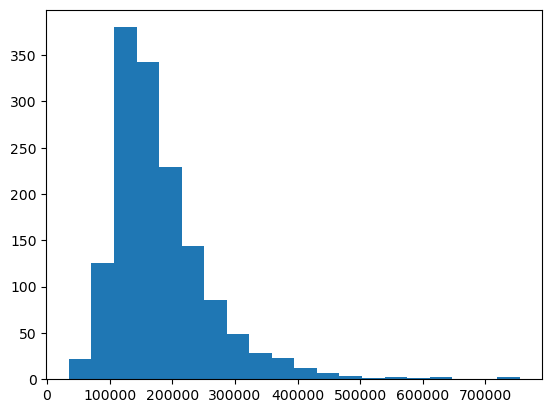

In [130]:
plt.hist(traindf['SalePrice'], bins=20)

<AxesSubplot:>

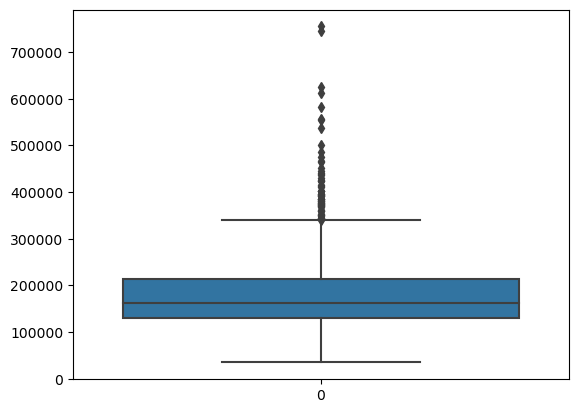

In [131]:
sns.boxplot(traindf['SalePrice'])

In [132]:
traindf['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [133]:
# Generate the plot using matplotlib
stats.probplot(traindf['SalePrice'], dist='norm', plot=pylab)
plt.show()
pylab.show()

AttributeError: 'float' object has no attribute 'probplot'

# Bi Variate Analysis

In [ ]:
traindf['Utilities'].value_counts()



In [ ]:
sns.barplot(data=traindf, x="Utilities", y="SalePrice")


In [ ]:
sns.barplot(data=traindf, x="BldgType", y="SalePrice")


In [ ]:
sns.boxplot(data=traindf, x="BldgType", y="SalePrice")


In [ ]:
sns.boxplot(data=traindf, x="HouseStyle", y="SalePrice")


**SalePrice is increasing as Overall Quality increases**

In [ ]:

sns.boxplot(data=traindf, x="OverallQual", y="SalePrice")


In [ ]:
sns.boxplot(data=traindf, x="OverallCond", y="SalePrice")


In [ ]:
traindf['OverallCond']

In [ ]:
traindf['YearBuilt'].describe()

In [ ]:
plt.scatter(traindf['YearBuilt'], traindf['SalePrice'])

In [ ]:

 sns.barplot(data=traindf, x="TotalFullBath", y="SalePrice")


In [ ]:
traindf[traindf['TotalFullBath'] == 0]

In [ ]:
 sns.boxplot(data=traindf, x="TotalFullBath", y="SalePrice")


In [ ]:

 sns.barplot(data=traindf, x="TotalHalfBath", y="SalePrice")


In [ ]:
 sns.boxplot(data=traindf, x="TotalHalfBath", y="SalePrice")


In [ ]:
sns.barplot(data=traindf, x="BedroomAbvGr", y="SalePrice")


In [ ]:
 sns.boxplot(data=traindf, x="BedroomAbvGr", y="SalePrice")


In [ ]:
GarageCars

In [ ]:
sns.boxplot(data=traindf, x="KitchenAbvGr", y="SalePrice")


In [ ]:
sns.boxplot(data=traindf, x="TotRmsAbvGrd", y="SalePrice")


In [ ]:
sns.boxplot(data=traindf, x="GarageCars", y="SalePrice")


In [ ]:
sns.scatterplot(data=traindf, x='PoolArea', y='SalePrice', hue='PoolQC')

In [ ]:
plt.scatter(traindf['PoolArea'], traindf['SalePrice'])

In [ ]:
traindf['RoofStyle'].sample(5)

In [ ]:
traindf['RoofStyle'].value_counts()

In [ ]:
traindf['MasVnrArea'].sample(5)

In [ ]:
traindf['ExterQual'].sample(5)

In [ ]:
traindf['ExterCond'].sample(5)

In [ ]:
traindf['Foundation'].sample(5)

In [ ]:
traindf['BsmtQual'].sample(5)

In [ ]:
traindf['Heating'].sample(5)

In [ ]:
traindf['CentralAir'].sample(5)

In [ ]:
traindf['BsmtFullBath'].sample(5)

In [ ]:
traindf['FullBath'].sample(5)

In [ ]:
traindf['BedroomAbvGr'].sample(5)

In [ ]:
traindf['KitchenAbvGr'].sample(5)

In [ ]:
traindf['Functional'].sample(5)

In [ ]:
traindf['Fireplaces'].sample(5)

In [ ]:
traindf['GarageArea'].sample(5)


In [ ]:
traindf['GarageQual'].sample(5)


In [ ]:
traindf['GarageCars'].sample(5)


In [ ]:

traindf['PoolArea'].sample(5)


In [ ]:
traindf['PoolQC'].sample(5)


In [ ]:
traindf['Fence'].sample(5)


In [ ]:
plt.show()

In [ ]:
FullBath
HalfBath

In [ ]:
traindf['OverallCond'].value_counts()